# Random Forest for Spam Detection

This notebook contains a simple example of using decision tree and random forest for spam detection. We aim to fit the hyperparameter in the training and validation steps and report the test set performance. Additionally, this notebook provides how to visualize the tree structure or the split of a node. 

In [1]:
import numpy as np
import scipy.io
from scipy import stats
import random
import matplotlib.pyplot as plt

from random_forest import *

In [2]:
features = ["pain", "private", "bank", "money", "drug", "spam", "prescription",
        "creative", "height", "featured", "differ", "width", "other",
        "energy", "business", "message", "volumes", "revision", "path",
        "meter", "memo", "planning", "pleased", "record", "out",
        "semicolon", "dollar", "sharp", "exclamation", "parenthesis",
        "square_bracket", "ampersand"]

assert len(features) == 32

# Load spam data
path_train = 'datasets/spam-dataset/spam_data.mat'
data = scipy.io.loadmat(path_train)
X = data['training_data']
y = np.squeeze(data['training_labels'])
class_names = ["Ham", "Spam"]

## 1. Hyperparameter Fitting

In [3]:
train_indices = np.random.choice(range(X.shape[0]), 
                                 int(X.shape[0] * 0.8),
                                 replace=False)

train_mask = np.zeros(X.shape[0], dtype=bool)
train_mask[train_indices] = True

X_train = X[train_mask]
y_train = y[train_mask]
X_validation = X[~train_mask]
y_validation = y[~train_mask]

### Decision Tree

In [5]:
tree_accs = []
depths = [5, 10, 15, 20, 25, 30]
for max_depth in depths:
    classifier = DecisionTree(max_depth=max_depth, impurity_thresh=0.01)
    classifier.train(X_train, y_train, 0)
    y_validation_hat = classifier.predict(X_validation)
    acc = sum(y_validation==y_validation_hat) / len(y_validation_hat)
    tree_accs.append(acc)

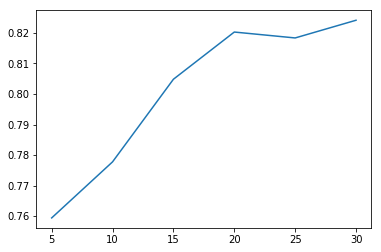

In [9]:
plt.plot(depths, tree_accs)

**we will proceed with 20 for the decision tree.**

### Random Forest

I first fix 20 as max_depth
I got (0.7, 0.7) as

In [12]:
forest_accs = []
nums = [3, 5, 7, 9]
for num_trees in nums:
    classifier = RandomForest(bagging_rate=0.7,
                              feature_rate=0.7,
                              num_trees=num_trees, 
                              max_depth=20, 
                              impurity_thresh=0.01)
    classifier.fit(X_train, y_train)
    y_validation_hat = classifier.predict(X_validation)
    acc = sum(y_validation==y_validation_hat) / len(y_validation_hat)
    forest_accs.append(acc)

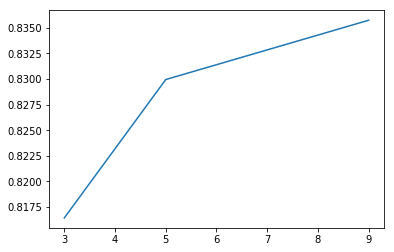

In [13]:
plt.plot(nums, forest_accs)

## 2. Performance Evaluation

### Decision Tree

In [22]:
classifier = DecisionTree(max_depth=20, impurity_thresh=0.01)
classifier.train(X_train, y_train, 0)

y_train_hat = classifier.predict(X_train)
y_validation_hat = classifier.predict(X_validation)

train_acc = sum(y_train==y_train_hat) / len(y_train_hat)
valid_acc = sum(y_validation==y_validation_hat) / len(y_validation_hat)

print("train accuracy: ", train_acc)
print("validation accuracy: ", valid_acc)

train accuracy:  0.8339376359680928
validation accuracy:  0.8270531400966183


### Random Forest

In [24]:
classifier = RandomForest(bagging_rate=0.7,
                          feature_rate=0.7,
                          num_trees=9, 
                          max_depth=20, 
                          impurity_thresh=0.01)
classifier.fit(X_train, y_train)

y_train_hat = classifier.predict(X_train)
y_validation_hat = classifier.predict(X_validation)

train_acc = sum(y_train==y_train_hat) / len(y_train_hat)
valid_acc = sum(y_validation==y_validation_hat) / len(y_validation_hat)

print("train accuracy: ", train_acc)
print("validation accuracy: ", valid_acc)

train accuracy:  0.8498912255257433
validation accuracy:  0.8309178743961353


## 3. Stating the splits when predicting

**In order to print the split statements, we set "suppress_print" as false.**

**For a sample result, we just use the first sample of the validation set.**

In [28]:
classifier = DecisionTree(max_depth=3, impurity_thresh=0.01)
classifier.train(X_train, y_train, 0)
classifier.predict(X_validation[0:1, :], suppress_print=False)

(creative) < 1.0
(prescription) >= 2.0
Therfore this email was Spam


array([1.])

## 4. Varying maximum depths

In [29]:
# 80 / 20 random split

train_indices = np.random.choice(range(X.shape[0]), 
                                 int(X.shape[0] * 0.8),
                                 replace=False)

train_mask = np.zeros(X.shape[0], dtype=bool)
train_mask[train_indices] = True

X_train = X[train_mask]
y_train = y[train_mask]
X_validation = X[~train_mask]
y_validation = y[~train_mask]

In [31]:
tree_accs = []
depths = np.arange(1, 41)
for max_depth in depths:
    classifier = DecisionTree(max_depth=max_depth, impurity_thresh=0.01)
    classifier.train(X_train, y_train, 0)
    y_validation_hat = classifier.predict(X_validation)
    acc = sum(y_validation==y_validation_hat) / len(y_validation_hat)
    tree_accs.append(acc)

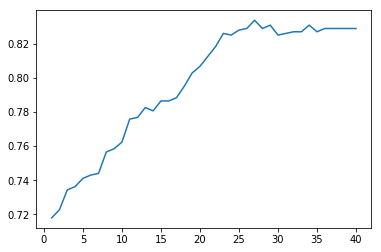

In [32]:
plt.plot(depths, tree_accs)

## 5. Printing Decision Tree

**Here, the left subtree is printed above the right subtree.**

In [41]:
classifier = DecisionTree(max_depth=3, impurity_thresh=0.01)
classifier.train(X_train, y_train, 0)
print(classifier)

(word: creative, thresh: 1.0)
  └---(word: private, thresh: 0.5)
        └---label: Ham
        └---label: Spam
  └---(word: drug, thresh: 1.0)
        └---label: Spam
        └---(word: prescription, thresh: 1.5)
              └---label: Spam
              └---(word: prescription, thresh: 0.5)
                    └---label: Spam
                    └---label: Ham
